In [ ]:
# Attribute Information: (classes: edible=e, poisonous=p)

# cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

# cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

# cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

# bruises: bruises=t,no=f

# odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

# gill-attachment: attached=a,descending=d,free=f,notched=n

# gill-spacing: close=c,crowded=w,distant=d

# gill-size: broad=b,narrow=n

# gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

# stalk-shape: enlarging=e,tapering=t

# stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

# stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

# stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

# stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

# stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

# veil-type: partial=p,universal=u

# veil-color: brown=n,orange=o,white=w,yellow=y

# ring-number: none=n,one=o,two=t

# ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

# spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

# population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

# habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [50]:
data = pd.read_csv('./mushrooms.csv')

In [51]:
data.head().T

,0,1,2,3,4
class,p,e,e,p,e
cap-shape,x,x,b,x,x
cap-surface,s,s,s,y,s
cap-color,n,y,w,w,g
bruises,t,t,t,t,f
odor,p,a,l,p,n
gill-attachment,f,f,f,f,f
gill-spacing,c,c,c,c,w
gill-size,n,b,b,n,b
gill-color,k,k,n,n,k


In [52]:
data.shape

(8124, 23)

In [53]:
# missing data
data.isnull().sum() 

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

C:\Users\DawOp\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

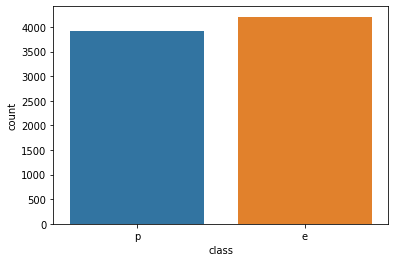

In [48]:
# trujace vs jadalne
sns.countplot(data['class'])


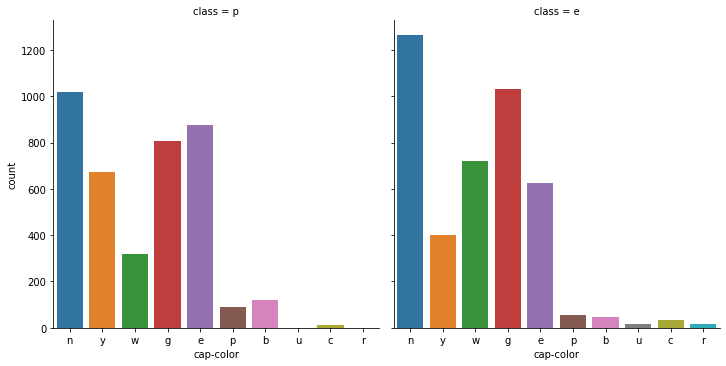

In [8]:
# cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
# cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
# cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

g = sns.catplot(x="cap-color",col="class",data=data, kind="count");

In [55]:
encoder = LabelEncoder()

for column in range(len(data.columns)):
    data[data.columns[column]] = encoder.fit_transform(data[data.columns[column]])

X = data.drop(['class'] , axis = 1)
y = data['class']

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 3,test_size = 0.2)

In [23]:
X_train.shape

(6499, 22)

In [24]:
X_test.shape

(1625, 22)

In [58]:
data.head().T

,0,1,2,3,4
class,1,0,0,1,0
cap-shape,5,5,0,5,5
cap-surface,2,2,2,3,2
cap-color,4,9,8,8,3
bruises,1,1,1,1,0
odor,6,0,3,6,5
gill-attachment,1,1,1,1,1
gill-spacing,0,0,0,0,1
gill-size,1,0,0,1,0
gill-color,4,4,5,5,4


In [66]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, BatchNormalization
from numpy.random import seed
import tensorflow as tf

def create_model(lyrs=[8], act='relu', opt='Adam', dr=0.0):
    model = Sequential()
   
    model.add(Dense(20,  activation='relu'))
    model.add(Dropout(0.2))

    model.add(Dense(6, activation='relu'))
    model.add(Dropout(0.2))

    model.add(Dense(3, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(units=1,activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

    return model

In [67]:
model = create_model()
print(model.summary())

ValueError: This model has not yet been built. Build the model first by calling `build()` or calling `fit()` with some data, or specify an `input_shape` argument in the first layer(s) for automatic build.

In [61]:
import numpy as np
training = model.fit(X_train, y_train, epochs=300, batch_size=32, validation_split=0.2, verbose=0)
val_acc = np.mean(training.history['val_accuracy'])
print("\n%s: %.2f%%" % ('val_accuracy', val_acc*100))


val_accuracy: 99.71%


In [62]:
model = create_model()
model.fit(X_train, y_train, epochs=300, batch_size=8, 
                     validation_split=0.2, verbose=0)

# evaluate the model
scores = model.evaluate(X_train, y_train)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

204/204 [==============================] - 0s 414us/step - loss: 0.0040 - accuracy: 1.0000

accuracy: 100.00%


In [63]:
import numpy as np
training = model.fit(X_train, y_train, epochs=300, batch_size=32, validation_split=0.2, verbose=0)
val_acc = np.mean(training.history['val_accuracy'])
print("\n%s: %.2f%%" % ('val_accuracy', val_acc*100))


val_accuracy: 100.00%


In [64]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

# create model
model = KerasClassifier(build_fn=create_model, verbose=0)

# define the grid search parameters
batch_size = [8, 16, 32, 64]
epochs = [50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)

# search the grid
grid = GridSearchCV(estimator=model, 
                    param_grid=param_grid,
                    cv=3,
                    verbose=2,
                    n_jobs=-1)

grid_result = grid.fit(train_data[[c for c in train_data.columns if c != 'class']], train_data['class'])
print("Best: %f using %s" % (grid_result.best_score_*100, grid_result.best_params_))

NameError: name 'train_data' is not defined

In [65]:
model = create_model()
model.fit(X_train, y_train, epochs=300, batch_size=8, 
                     validation_split=0.2, verbose=0)

# evaluate the model
scores = model.evaluate(X_train, y_train)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

204/204 [==============================] - 0s 405us/step - loss: 0.0040 - accuracy: 1.0000

accuracy: 100.00%


In [42]:
preds = model.predict(X_test)
preds = pd.DataFrame(preds)
preds.columns = ['class']
preds['class'] = (preds['class'] > .5).astype(int)
preds.index = test_data.index
print(preds.head())
preds.to_csv("result_test.csv", index=True)

NameError: name 'test_data' is not defined